# Test ML Rain detector

The purpose of this program is to read austin weather data and use binary classification machine learning to predict if rain will occur.

## ETL

**1. Extract**

We converted the .csv file of weather data into a pandas dataframe. This will make it easier to transform the data.

**2. Transform**

Next, another column called 'Outcome' was added to the dataframe. This column was added to aid the binary classification ML algorithms. Every row was iterated through and checked to see if the 'Events' column detailing the weather events for that day told of rain. If so, 'Outcome' was set to 1 (True), and if not, it was set to 0 (False).

Additionally, all rows with '-' representing incomplete data were dropped. We then split the dataset into a training set by which the ML algorithm would be trained on, and a testing set which would be the benchmark for how accurate our data was. The training set included the first 1000 rows of data, and the testing set had the remaining (218) rows. They were then exported to .csv files

**3. Load**

In the second codeblock, the .csv files were loaded as testing and training dataframe. We selected all the attributes of the original dataset (barring precipitation due to incomplete data) to train the algorithm on.

In [9]:
import pandas as pd

weather = pd.read_csv('austin_weather.csv')

#Add a new column called outcome.
#Outcome is set to 1 if there was rain for the selected date, and 0 if not.
#Used for binary classification.
weather['Outcome'] = ""
for column in range(len(weather['Events'])):
    if 'Rain' in weather['Events'][column]:
        weather.loc[column, "Outcome"] = 1
    else:
        weather.loc[column, "Outcome"] = 0

#Drops all rows with insufficient data (rows that have a "-").
#These rows break the ML learning algorithm and have to be removed.
for column in weather:
    weather = weather[~weather[column].isin(['-'])]

#weather = weather.loc[:,["TempHighF", "TempAvgF", "TempLowF", "WindHighMPH", "WindAvgMPH", "WindGustMPH", "Events", "Outcome"]]

train = weather.loc[0:1000, :]
test = weather.loc[1001:, :]

#train.to_csv('weather_train.csv')
#test.to_csv('weather_test.csv')

## Training our ML algorithm

In [10]:
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_df = pd.read_csv("weather_train.csv")
train_features = train_df[["TempHighF", "TempAvgF", "TempLowF", "DewPointHighF", "DewPointAvgF", 
                           "DewPointLowF", "HumidityHighPercent", "HumidityAvgPercent", "HumidityLowPercent", 
                           "SeaLevelPressureHighInches", "SeaLevelPressureAvgInches", "SeaLevelPressureLowInches", 
                           "VisibilityHighMiles", "VisibilityAvgMiles", "VisibilityLowMiles", "WindHighMPH", 
                           "WindAvgMPH", "WindGustMPH"]]

train_labels = train_df["Outcome"]

# Now let's define our models
lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)

# train our models
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())

print ("Models trained successfully...")

#load test data
test_df = pd.read_csv("weather_test.csv")

# Extract the input features
test_inputs = test_df[["TempHighF", "TempAvgF", "TempLowF", "DewPointHighF", "DewPointAvgF", "DewPointLowF", "HumidityHighPercent", "HumidityAvgPercent", "HumidityLowPercent", "SeaLevelPressureHighInches", "SeaLevelPressureAvgInches", "SeaLevelPressureLowInches", "VisibilityHighMiles", "VisibilityAvgMiles", "VisibilityLowMiles", "WindHighMPH", "WindAvgMPH", "WindGustMPH"]]
y_actual = test_df["Outcome"]

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using logistic regression model
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier on test data= {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier on test data = {mlp_accuracy_score}")

Models trained successfully...
Accuracy of the Logistic Classifier on test data= 0.870253164556962
Accuracy of the MLP Classifier on test data = 0.870253164556962


With the training and testing datasets loaded, we imported sklearn and began to train the ML algorithm using Logistic and MLP classification. We found that our MLP classifier was 85.7% accurate, while our logistic classifier was 87% accurate.

Now, let's predict a single instance using our Logistic Regression model. For this example, we will use the values from one day in our dataset where it rained.

In [11]:
TempHighF = 74
TempAvgF = 60
TempLowF = 45
DewPointHighF = 67
DewPointAvgF = 49
DewPointLowF = 43
HumidityHighPercent = 93
HumidityAvgPercent = 75
HumidityLowPercent = 57
SeaLevelPressureHighInches = 29.86
SeaLevelPressureAvgInches = 29.68
SeaLevelPressureLowInches = 29.59
VisibilityHighMiles = 10
VisibilityAvgMiles = 7
VisibilityLowMiles = 2
WindHighMPH = 20
WindAvgMPH = 4
WindGustMPH = 31

input_data = numpy.array([[TempHighF, TempAvgF, TempLowF, 
                         DewPointHighF, DewPointAvgF, DewPointLowF, 
                         HumidityHighPercent, HumidityAvgPercent, HumidityLowPercent, 
                         SeaLevelPressureHighInches, SeaLevelPressureAvgInches, SeaLevelPressureLowInches, 
                         VisibilityHighMiles, VisibilityAvgMiles, VisibilityLowMiles, 
                         WindHighMPH, WindAvgMPH, WindGustMPH]]) 

y_predicted_lr = lr_classifier.predict(input_data)
score = lr_classifier.predict_proba(input_data)


if y_predicted_lr[0]==1:
    print (f"It is likely to rain in the near future (classifier confidence = {score[0][1]})")
    
if y_predicted_lr[0]==0:
    print (f"It is not likely to rain in the near future (classifier confidence = {score[0][0]})")

It is likely to rain in the near future (classifier confidence = 0.9442171343897349)


## Using a different feature set

We now want to initialize and train Logistic Regression classifier for predicting the likelihood of rain using the following columns that we hypothesize to have the largest impact on the outcome:

**Feature Columns (Input):**
- TempAvgF: Average temperature, in Fahrenheit
- DewPointAvgF: Average dew point, in Fahrenheit
- HumidityAvgPercent: Average humidity, as a percentage
- SeaLevelPressureAvgInches: Average sea level pressure, in inches
- VisibilityAvgMiles: Average visibility, in miles
- WindAvgMPH: Average wind speed, in miles per hour
- WindGustMPH: Highest wind speed gust, in miles per hour

**Label (Output):**
- Outcome: Class variable (0 or 1)

Now, try to explain the model's prediction with a few input instances

In [12]:
train_df = pd.read_csv("weather_train.csv")
train_features = train_df[["TempAvgF", "DewPointAvgF", "HumidityAvgPercent", 
                           "SeaLevelPressureAvgInches", "VisibilityAvgMiles",
                            "WindAvgMPH", "WindGustMPH"]]
train_labels = train_df["Outcome"]

# Now let's define our models
lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)

# train our models
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())

print ("Models trained successfully...")

#load test data
test_df = pd.read_csv("weather_test.csv")

# Extract the input features
test_inputs = test_df[["TempAvgF", "DewPointAvgF", "HumidityAvgPercent", 
                           "SeaLevelPressureAvgInches", "VisibilityAvgMiles",
                            "WindAvgMPH", "WindGustMPH"]]
y_actual = test_df["Outcome"]

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

print (f"Accuracy of the Logistic Classifier on test data= {lr_accuracy_score}")

Models trained successfully...
Accuracy of the Logistic Classifier on test data= 0.8291139240506329


Now that our Logistic Regression model is trained with an accuracy of 82.9%, let's predict a single instance using the same values in the previous example. This way, we can compare the classifer confidence across different feature sets to determine which features have the most impact on the likelihood of rain.

In [13]:
TempAvgF = 60
DewPointAvgF = 49
HumidityAvgPercent = 75
SeaLevelPressureAvgInches = 29.68
VisibilityAvgMiles = 7
WindAvgMPH = 4
WindGustMPH = 31

input_data = numpy.array([[TempAvgF, DewPointAvgF, HumidityAvgPercent, 
                          SeaLevelPressureAvgInches, VisibilityAvgMiles, 
                           WindAvgMPH, WindGustMPH]]) 

y_predicted_lr = lr_classifier.predict(input_data)
score = lr_classifier.predict_proba(input_data)


if y_predicted_lr[0]==1:
    print (f"It is likely to rain in the near future (classifier confidence = {score[0][1]})")
    
if y_predicted_lr[0]==0:
    print (f"It is not likely to rain in the near future (classifier confidence = {score[0][0]})")

It is likely to rain in the near future (classifier confidence = 0.8527395479440197)


Using a smaller different feature set, our classifer confidence is 85.2%, while the larger feature set had a classifer confidence of 94.3%. Both feature sets correctly predicted the outcome---that it will rain in the near future.

We chose to limit our feature set because certain values, such as high or low temp, humidity, etc., are repetitive given that the dataset already contains averages. Additionally, these features did not have a significant impact on the accuracy of the Logisitc Classifer or the classifier confidence. 

## Visualization

Now that the model is trained on our specified feature set, it's time to load Lime and see it's analysis of our  data.

In [14]:
try:
    import lime
except:
    !pip install lime
    import lime

In [15]:
import lime
import numpy
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=train_features.to_numpy(),
    feature_names=train_features.columns,
    class_names=[0, 1],
    mode='classification'
)

In [16]:
TempAvgF = 60
DewPointAvgF = 49
HumidityAvgPercent = 75
SeaLevelPressureAvgInches = 29.68
VisibilityAvgMiles = 7
WindAvgMPH = 4
WindGustMPH = 31

input_data = numpy.array([TempAvgF, DewPointAvgF, HumidityAvgPercent, 
                          SeaLevelPressureAvgInches, VisibilityAvgMiles, 
                           WindAvgMPH, WindGustMPH]) 
exp = explainer.explain_instance(
    data_row=input_data, 
    predict_fn=lr_classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

There is a high likelihood that it will rain in the near future, given that the prediction probability that it will rain is 0.85. In this instance, average temperature, high wind speed gust, average visability, and average humidity are features that result in a higher chance of rain.

Text(0.5, 1.0, 'Correlation Heatmap between Variables')

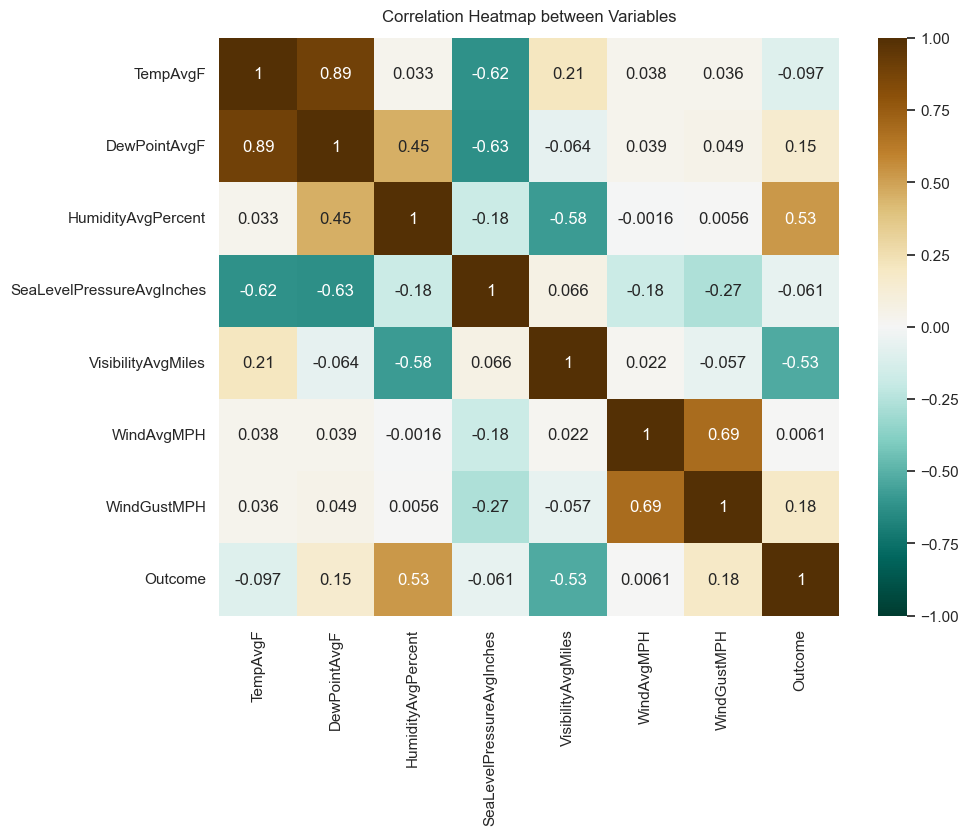

In [219]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 7.5)})

w_df = weather.loc[:,["TempAvgF", "DewPointAvgF", "HumidityAvgPercent", "SeaLevelPressureAvgInches", 
                      "VisibilityAvgMiles", "WindAvgMPH", "WindGustMPH", "Outcome"]]
w_df = w_df.astype({'TempAvgF': 'float', 'DewPointAvgF': 'float', 'HumidityAvgPercent': 'float', 'SeaLevelPressureAvgInches': 'float', 'VisibilityAvgMiles': 'float', 'WindAvgMPH': 'float', 'WindGustMPH': 'float', 'Outcome': 'float' })

heatmap = sns.heatmap(w_df.corr(), vmin = -1.0, vmax = 1.0, cmap = 'BrBG_r', annot = True)
heatmap.set_title('Correlation Heatmap between Variables', fontdict={'fontsize':12}, pad=12)

/var/folders/vd/f66k_0pj5k18dypmbkw_wd7m0000gn/T/ipykernel_13727/81589262.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(w_df.corr(), dtype=np.bool))


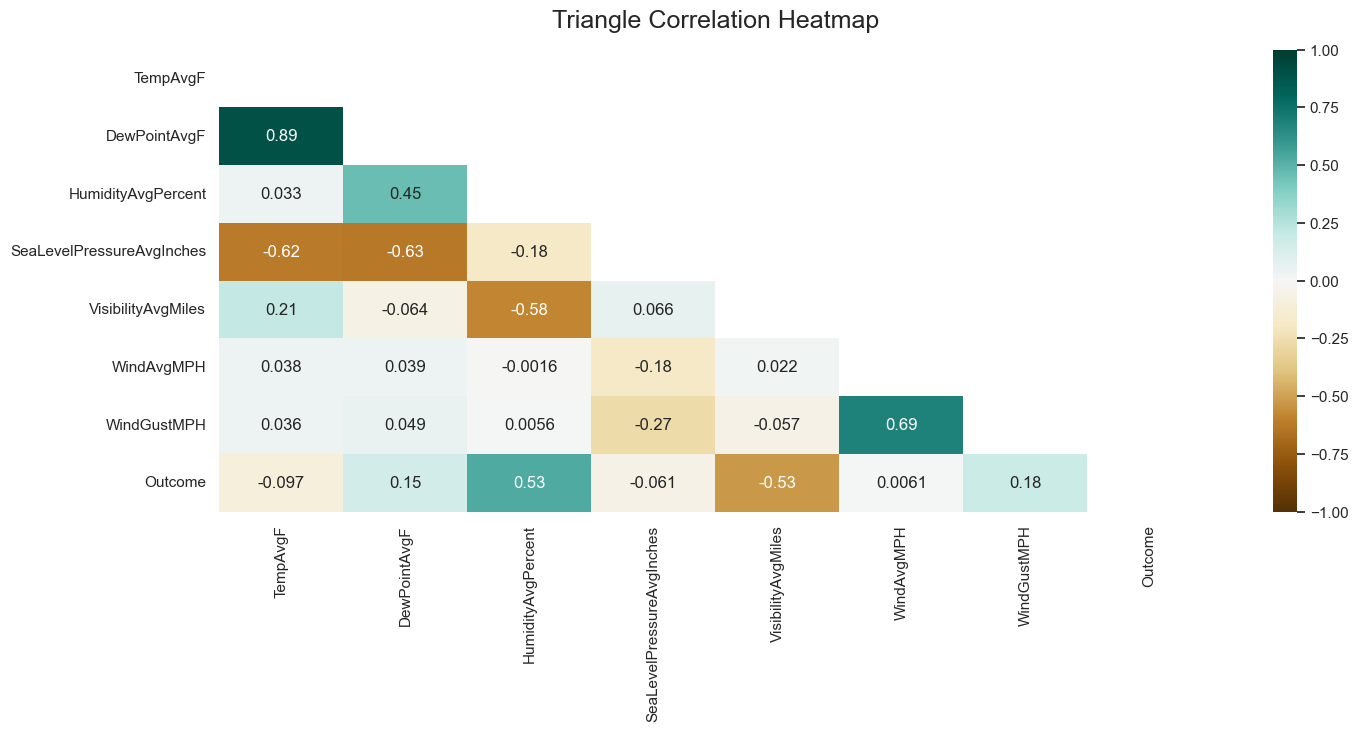

In [200]:
import numpy as np
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(w_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(w_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
heatmap.set_facecolor('w')

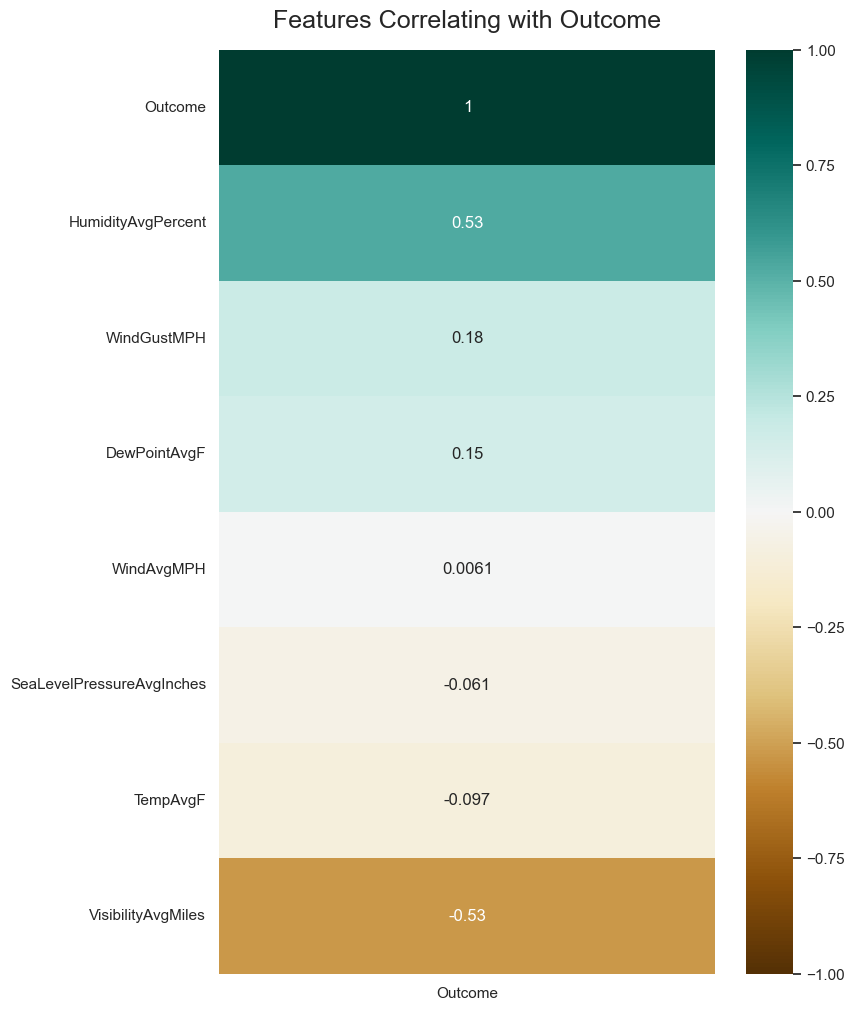

In [24]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(w_df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Outcome', fontdict={'fontsize':18}, pad=16);

Text(0.5, 0.98, 'Bivariate Analysis Hexplot of the Four Strongest Correlations')

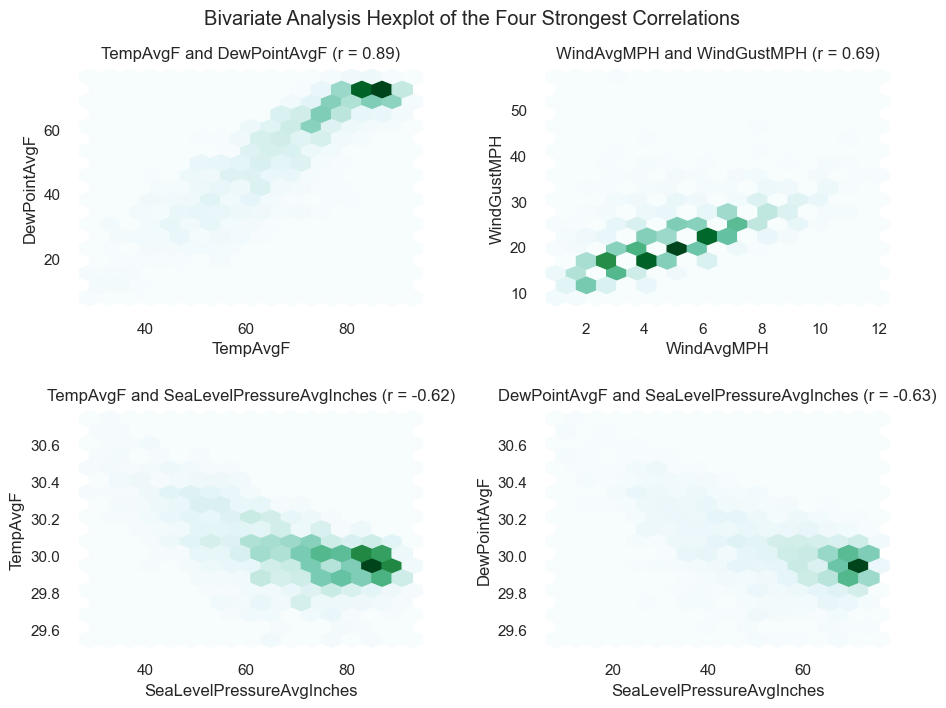

In [201]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad = 4.0)

for i in ['top', 'bottom', 'left', 'right']:
    axs[0, 0].spines[i].set_visible(False)
    axs[0, 1].spines[i].set_visible(False)
    axs[1, 0].spines[i].set_visible(False)
    axs[1, 1].spines[i].set_visible(False)

axs[0, 0].hexbin(x = w_df['TempAvgF'], y = w_df['DewPointAvgF'], gridsize= 16, cmap = "BuGn")
axs[0, 0].set_title(label = "TempAvgF and DewPointAvgF (r = 0.89)")
axs[0, 0].set_xlabel('TempAvgF')
axs[0, 0].set_ylabel('DewPointAvgF')
axs[0, 0].grid(False)
axs[0, 0].set_facecolor('w')

axs[0, 1].hexbin(x = w_df['WindAvgMPH'], y = w_df['WindGustMPH'], gridsize= 16, cmap = "BuGn")
axs[0, 1].set_title(label = "WindAvgMPH and WindGustMPH (r = 0.69)")
axs[0, 1].set_xlabel('WindAvgMPH')
axs[0, 1].set_ylabel('WindGustMPH')
axs[0, 1].grid(False)
axs[0, 1].set_facecolor('w')

axs[1, 0].hexbin(x = w_df['TempAvgF'], y = w_df['SeaLevelPressureAvgInches'], gridsize= 16, cmap = "BuGn")
axs[1, 0].set_title(label = "TempAvgF and SeaLevelPressureAvgInches (r = -0.62)")
axs[1, 0].set_xlabel('SeaLevelPressureAvgInches')
axs[1, 0].set_ylabel('TempAvgF')
axs[1, 0].grid(False)
axs[1, 0].set_facecolor('w')

axs[1, 1].hexbin(x = w_df['DewPointAvgF'], y = w_df['SeaLevelPressureAvgInches'], gridsize= 16, cmap = "BuGn")
axs[1, 1].set_title(label = "DewPointAvgF and SeaLevelPressureAvgInches (r = -0.63)")
axs[1, 1].set_xlabel('SeaLevelPressureAvgInches')
axs[1, 1].set_ylabel('DewPointAvgF')
axs[1, 1].grid(False)
axs[1, 1].set_facecolor('w')

fig.suptitle('Bivariate Analysis Hexplot of the Four Strongest Correlations')

In [104]:
w_df['VisibilityAvgMiles'].describe()

count    1305.000000
mean        9.162452
std         1.459463
min         2.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: VisibilityAvgMiles, dtype: float64

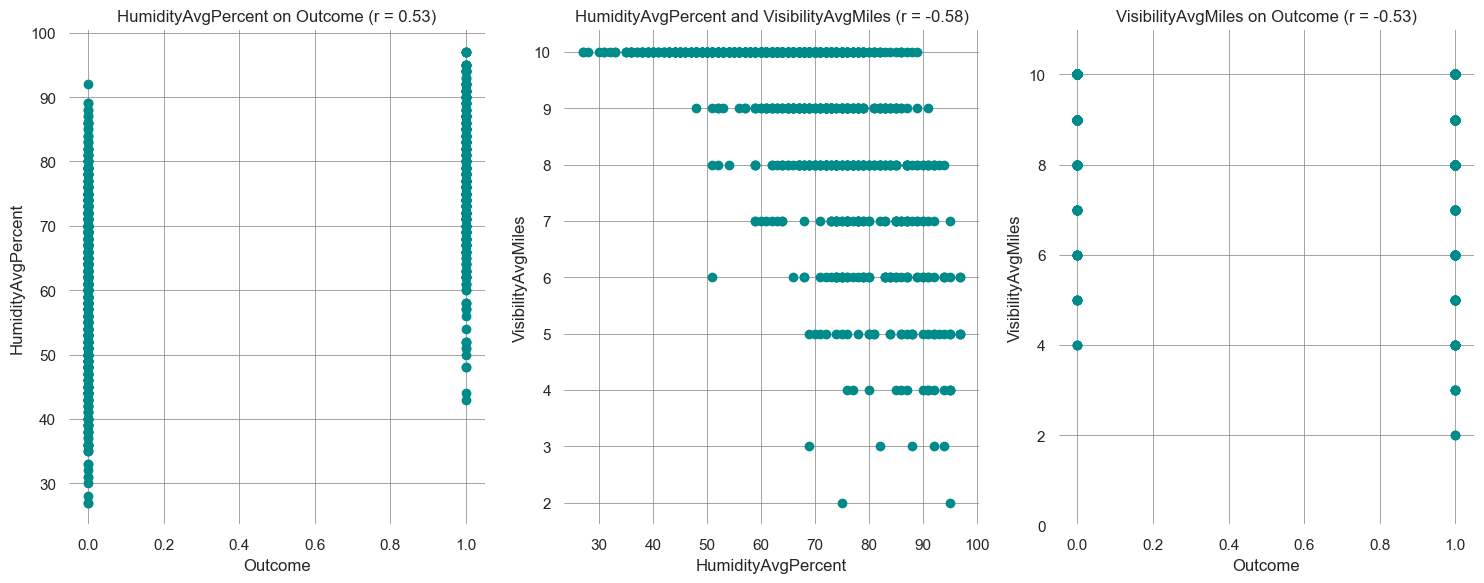

In [233]:
fig, axs = plt.subplots(1,3, figsize=(15,6))
plt.subplots_adjust(hspace=0.5)
fig.set_tight_layout(True)
fig.tight_layout(pad = 4.0)

for i in ['left', 'right']:
    axs[0].spines[i].set_visible(False)
    axs[1].spines[i].set_visible(False)
    axs[2].spines[i].set_visible(False)

axs[0].scatter(x = w_df['Outcome'], y = w_df['HumidityAvgPercent'], c = "darkcyan")
axs[0].set_title(label = "HumidityAvgPercent on Outcome (r = 0.53)")
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('HumidityAvgPercent')
axs[0].set_facecolor('w')
axs[0].grid(True, color='grey', linewidth=0.5)


axs[1].scatter(x = w_df['HumidityAvgPercent'], y = w_df['VisibilityAvgMiles'], c = "darkcyan")
axs[1].set_title(label = "HumidityAvgPercent and VisibilityAvgMiles (r = -0.58)")
axs[1].set_xlabel('HumidityAvgPercent')
axs[1].set_ylabel('VisibilityAvgMiles')
plt.ylim((0,11))
axs[1].set_facecolor('w')
axs[1].grid(True, color='grey', linewidth=0.5)

axs[2].scatter(x = w_df['Outcome'], y = w_df['VisibilityAvgMiles'], c = "darkcyan")
axs[2].set_title(label = "VisibilityAvgMiles on Outcome (r = -0.53)")
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('VisibilityAvgMiles')
axs[2].set_facecolor('w')
axs[2].grid(True, color='grey', linewidth=0.5)


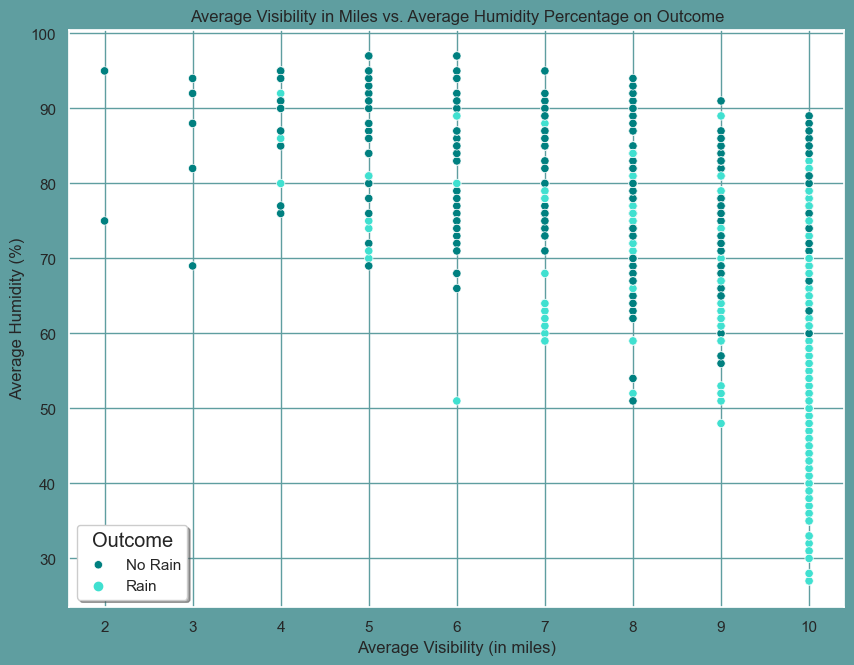

In [307]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'cadetblue'})
sns.scatterplot(data=w_df, x='VisibilityAvgMiles', y='HumidityAvgPercent', hue='Outcome', palette=['turquoise','teal']).set(title='Average Visibility in Miles vs. Average Humidity Percentage on Outcome')
plt.grid(True, color='cadetblue', linewidth=1)
plt.xlabel('Average Visibility (in miles)')
plt.ylabel('Average Humidity (%)')
plt.legend(title='Outcome', loc='lower left', labels=['No Rain', 'Rain'],title_fontsize='large',shadow=True)



